演示使用R语言基于IPD数据绘制KM曲线。

# 生存曲线绘制

先加载一下必要的包：

In [1]:
library(survminer) # 加载包
library(survival) # 加载包

载入需要的程序包：ggplot2
载入需要的程序包：ggpubr

载入程序包：‘survival’

The following object is masked from ‘package:survminer’:

    myeloma



使用演示数据集：

In [2]:
data(lung) # 加载lung数据集
View(lung) # 查看数据集

警告信息:
In data(lung) : 没有‘lung’这个数据集


In [3]:
attach(lung) # 绑定数据集
Surv(time,status) # 创建生存对象

  [1]  306   455  1010+  210   883  1022+  310   361   218   166   170   654   728    71   567   144 
 [17]  613   707    61    88   301    81   624   371   394   520   574   118   390    12   473    26 
 [33]  533   107    53   122   814   965+   93   731   460   153   433   145   583    95   303   519 
 [49]  643   765   735   189    53   246   689    65     5   132   687   345   444   223   175    60 
 [65]  163    65   208   821+  428   230   840+  305    11   132   226   426   705   363    11   176 
 [81]  791    95   196+  167   806+  284   641   147   740+  163   655   239    88   245   588+   30 
 [97]  179   310   477   166   559+  450   364   107   177   156   529+   11   429   351    15   181 
[113]  283   201   524    13   212   524   288   363   442   199   550    54   558   207    92    60 
[129]  551+  543+  293   202   353   511+  267   511+  371   387   457   337   201   404+  222    62 
[145]  458+  356+  353   163    31   340   229   444+  315+  182   156   329   364

In [4]:
fit <- survfit(Surv(time,status) ~ sex,  # 创建生存对象
               data = lung) # 数据集来源
fit # 查看拟合曲线信息

Call: survfit(formula = Surv(time, status) ~ sex, data = lung)

        n events median 0.95LCL 0.95UCL
sex=1 138    112    270     212     310
sex=2  90     53    426     348     550

In [5]:
summary(fit)

Call: survfit(formula = Surv(time, status) ~ sex, data = lung)

                sex=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
   11    138       3   0.9783  0.0124       0.9542        1.000
   12    135       1   0.9710  0.0143       0.9434        0.999
   13    134       2   0.9565  0.0174       0.9231        0.991
   15    132       1   0.9493  0.0187       0.9134        0.987
   26    131       1   0.9420  0.0199       0.9038        0.982
   30    130       1   0.9348  0.0210       0.8945        0.977
   31    129       1   0.9275  0.0221       0.8853        0.972
   53    128       2   0.9130  0.0240       0.8672        0.961
   54    126       1   0.9058  0.0249       0.8583        0.956
   59    125       1   0.8986  0.0257       0.8496        0.950
   60    124       1   0.8913  0.0265       0.8409        0.945
   65    123       2   0.8768  0.0280       0.8237        0.933
   71    121       1   0.8696  0.0287       0.8152        0.928
   81    120     

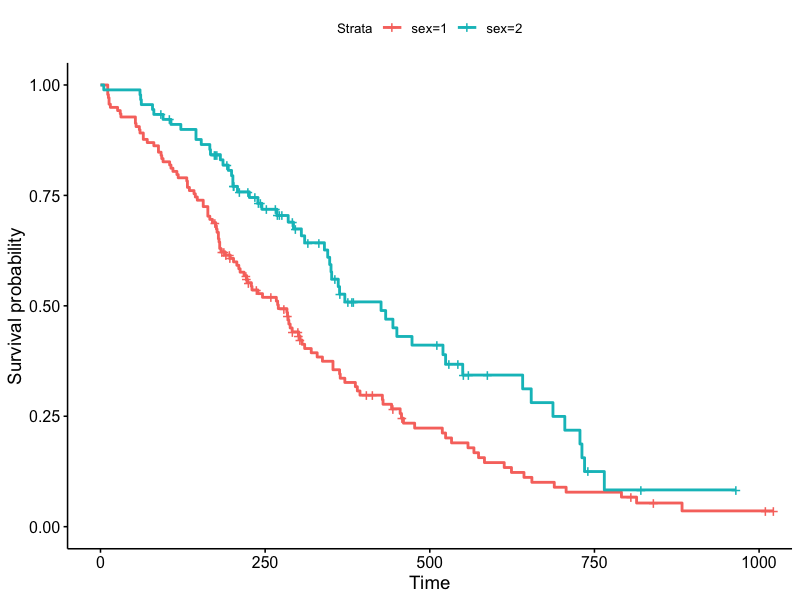

In [6]:
ggsurvplot(fit, data = lung)

警告信息:
1: In geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)),  :
  All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row.
2: In geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)),  :
  All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row.


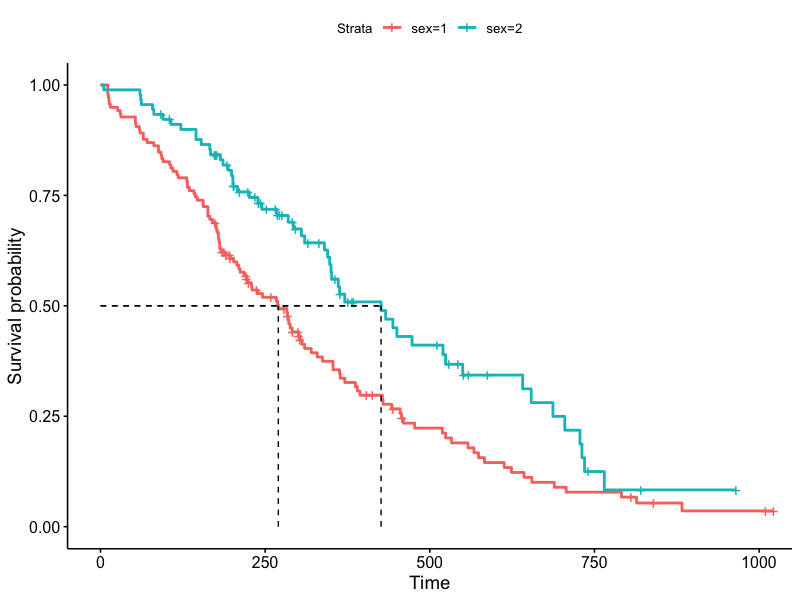

In [7]:
ggsurvplot(fit, data = lung, surv.median.line = "hv")

警告信息:
1: In geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)),  :
  All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row.
2: In geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)),  :
  All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row.


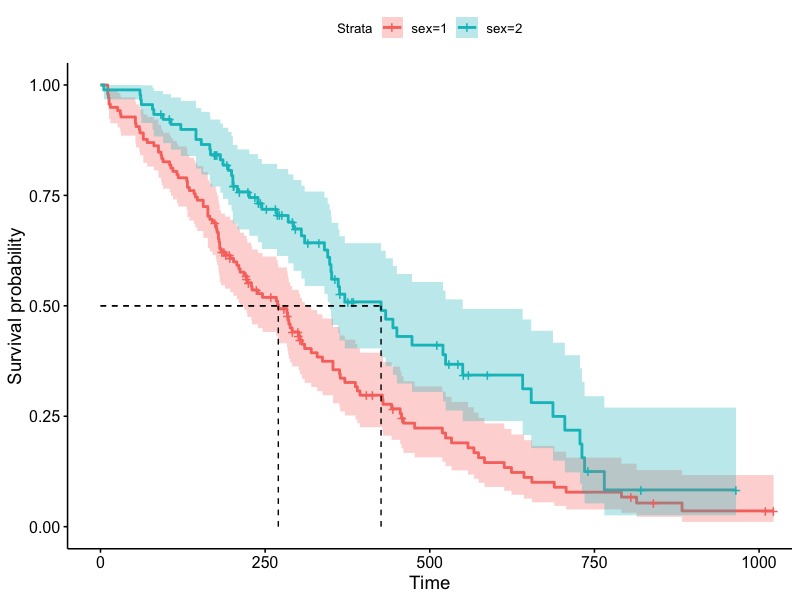

In [8]:
ggsurvplot(fit, data = lung,
  surv.median.line = "hv",  # 增加中位生存时间
  conf.int = TRUE) # 增加置信区间

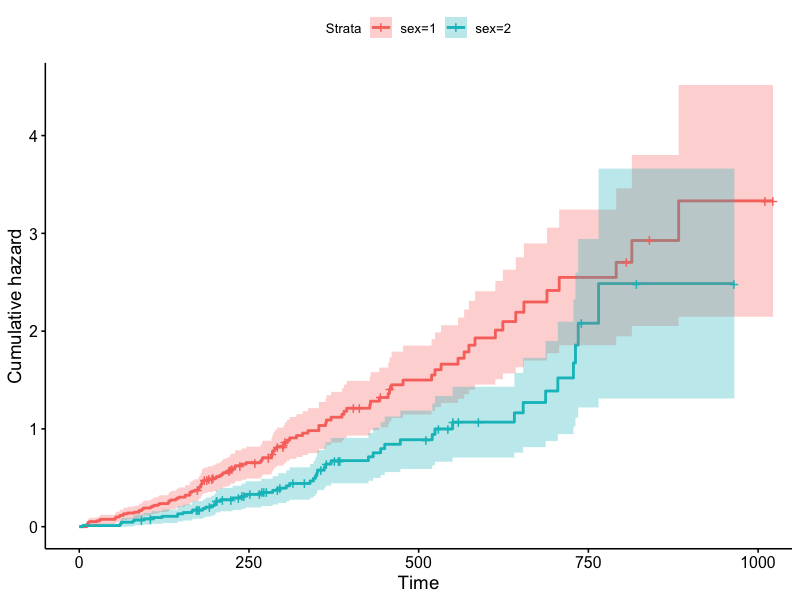

In [9]:
ggsurvplot(fit, data = lung,
  conf.int = TRUE, # 增加置信区间
  fun = "cumhaz") # 绘制累计风险曲线

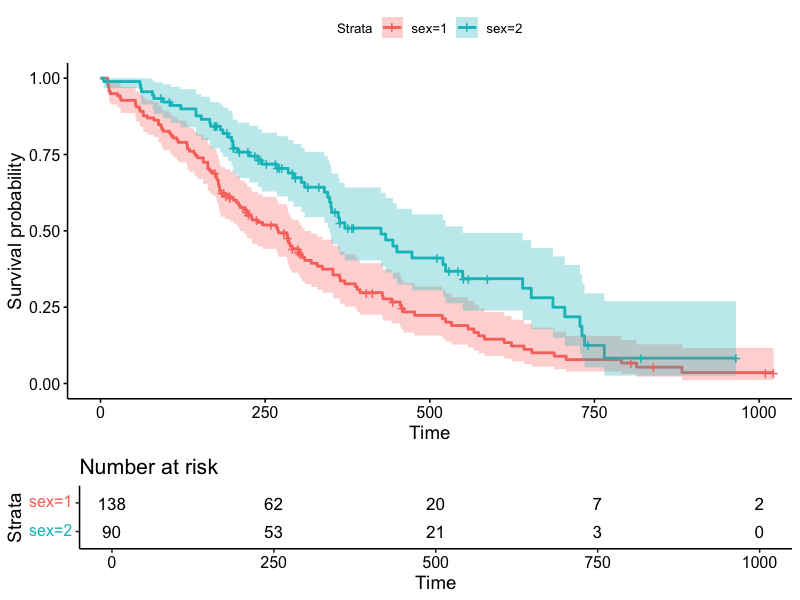

In [10]:
ggsurvplot(fit, data = lung,
  conf.int = TRUE,  # 增加置信区间
  risk.table = TRUE)

警告信息:
1: In geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)),  :
  All aesthetics have length 1, but the data has 3 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row.
2: In geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)),  :
  All aesthetics have length 1, but the data has 3 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row.


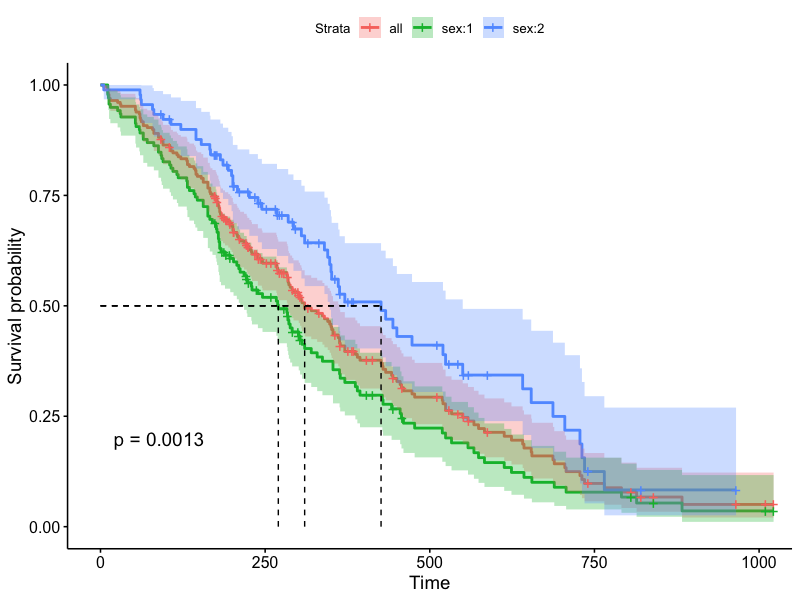

In [11]:
ggsurvplot(fit, # 创建的拟合对象
  data = lung,  # 指定变量数据来源
  conf.int = TRUE, # 显示置信区间
  pval = TRUE, # 添加P值
  surv.median.line = "hv",  # 添加中位生存时间线
  add.all = TRUE) # 添加总患者生存曲线

警告信息:
1: In geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)),  :
  All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row.
2: In geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)),  :
  All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row.


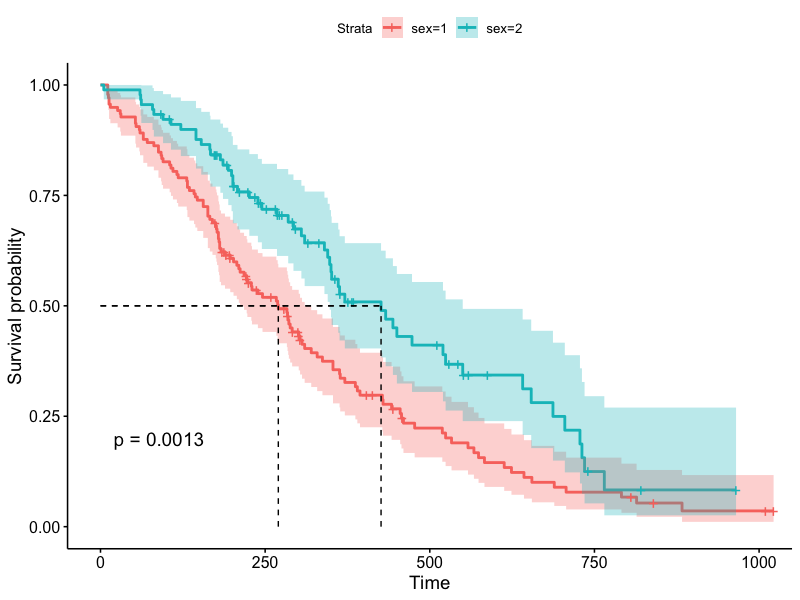

In [12]:
ggsurvplot(fit, # 创建的拟合对象
  data = lung,  # 指定变量数据来源
  conf.int = TRUE, # 显示置信区间
  pval = TRUE, # 添加P值
  surv.median.line = "hv", # 添加中位生存时间线
  palette = "hue")  # 自定义调色板

警告信息:
1: In geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)),  :
  All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row.
2: In geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)),  :
  All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row.
3: In geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)),  :
  All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row.
4: In geom_segment(aes(x = 0, y = max(y2), xend = max(x1), yend = max(y2)),  :
  All aesthetics have length 1, but the data has 2 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing a single row.


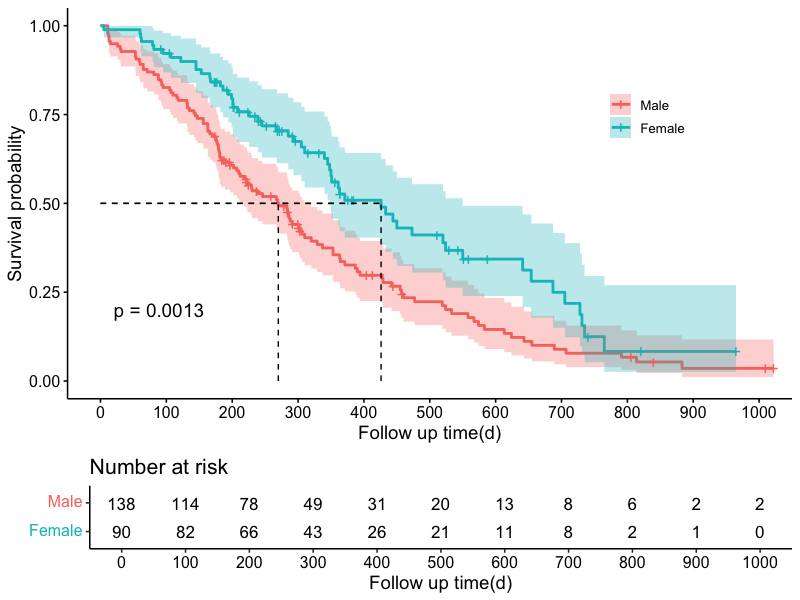

In [13]:
ggsurvplot(fit, # 创建的拟合对象
  data = lung,  # 指定变量数据来源
  conf.int = TRUE, # 显示置信区间
  pval = TRUE, # 添加P值
  surv.median.line = "hv",  # 添加中位生存时间线
  risk.table = TRUE, # 添加风险表
  xlab = "Follow up time(d)", # 指定x轴标签
  legend = c(0.8,0.75), # 指定图例位置
  legend.title = "", # 设置图例标题
  legend.labs = c("Male", "Female"), # 指定图例分组标签
  break.x.by = 100)  # 设置x轴刻度间距

# 生存率比较

## log-rank检验

In [14]:
data(lung)
head(lung) # 查看数据结构
# 数据预处理：
# 1. 处理缺失值
lung <- na.omit(lung)
# 2. 将分类变量转换为因子（如性别）
lung$sex <- factor(lung$sex, labels = c("Male", "Female"))

警告信息:
In data(lung) : 没有‘lung’这个数据集


In [15]:
# 加载包
library(survival)
library(survminer)

In [17]:
logrank_result <- survdiff(Surv(time, status) ~ sex, data = lung)
logrank_result

Call:
survdiff(formula = Surv(time, status) ~ sex, data = lung)

             N Observed Expected (O-E)^2/E (O-E)^2/V
sex=Male   103       82     68.7      2.57      6.05
sex=Female  64       38     51.3      3.44      6.05

 Chisq= 6  on 1 degrees of freedom, p= 0.01 

## Breslow检验

In [18]:
library(survival)
library(survminer)

# 使用肺癌数据集（lung）
data(lung)
lung$sex <- factor(lung$sex, labels = c("Male", "Female"))

# 执行Breslow检验（rho=1）
breslow_test <- survdiff(
  Surv(time, status) ~ sex, 
  data = lung, 
  rho = 1  # 设置权重为风险人数（Gehan-Breslow）
)

# 输出结果
print(breslow_test)

警告信息:
In data(lung) : 没有‘lung’这个数据集


Call:
survdiff(formula = Surv(time, status) ~ sex, data = lung, rho = 1)

             N Observed Expected (O-E)^2/E (O-E)^2/V
sex=Male   103     51.0     41.8      2.01      6.76
sex=Female  64     21.1     30.3      2.77      6.76

 Chisq= 6.8  on 1 degrees of freedom, p= 0.009 


In [19]:
library(survival)
library(survminer)

# 使用肺癌数据集（lung）
data(lung)
lung$sex <- factor(lung$sex, labels = c("Male", "Female"))

# 执行Tarone-Ware检验（rho=0.5）
tarone_ware_test <- survdiff(
  Surv(time, status) ~ sex, 
  data = lung, 
  rho = 0.5  # 设置权重为√n_j（Tarone-Ware）
)

# 输出结果
print(tarone_ware_test)

警告信息:
In data(lung) : 没有‘lung’这个数据集


Call:
survdiff(formula = Surv(time, status) ~ sex, data = lung, rho = 0.5)

             N Observed Expected (O-E)^2/E (O-E)^2/V
sex=Male   103     62.8     52.0      2.26      6.72
sex=Female  64     27.4     38.3      3.07      6.72

 Chisq= 6.7  on 1 degrees of freedom, p= 0.01 
